# Modeling

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from lightgbm import plot_importance

In [109]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [110]:
main_df = pd.read_csv('C:/Users/legg0/Desktop/main_df.csv')

C:\Users\legg0\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [111]:
main_df

,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,clac_hlv_nm,Lpay_use
0,1,A01,A010039,PD0290,20210101,10,15000,1,여성,50대,Z17,남성의류,0
1,1,A01,A010025,9999,20210101,10,79700,1,여성,40대,Z13,99999,0
2,1,A01,A010039,PD0290,20210101,10,19000,1,여성,50대,Z17,남성의류,0
3,1,A01,A010039,PD0290,20210101,10,19000,1,여성,50대,Z17,남성의류,0
4,1,A01,A010039,PD1692,20210101,10,9900,1,여성,50대,Z17,테넌트/음식점,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266584,2,A06,0,9999,20211231,22,50000,1,여성,40대,Z17,99999,0
1266585,2,A06,0,9999,20211231,22,10000,1,여성,40대,Z17,99999,0
1266586,2,A06,0,9999,20211231,23,289000,1,남성,20대,Z17,남성의류,0
1266587,2,A06,0,9999,20211231,23,200000,1,남성,40대,Z10,99999,0


## Encoding

In [112]:
main_df['br_c'] = main_df['br_c'].replace('999', 999)
main_df['br_c'] = main_df['br_c'].replace('0', 0)

In [113]:
main_df = pd.get_dummies(main_df)


In [114]:
main_df

,chnl_dv,de_dt,de_hr,buy_am,buy_ct,Lpay_use,cop_c_A01,cop_c_A02,cop_c_A03,cop_c_A04,cop_c_A05,cop_c_A06,br_c_0,br_c_999,br_c_A010001,br_c_A010002,br_c_A010003,br_c_A010004,br_c_A010006,br_c_A010008,br_c_A010011,br_c_A010013,br_c_A010015,br_c_A010017,br_c_A010020,br_c_A010023,br_c_A010024,br_c_A010025,br_c_A010026,br_c_A010027,br_c_A010028,br_c_A010032,br_c_A010033,br_c_A010034,br_c_A010037,br_c_A010039,br_c_A010041,br_c_A010042,br_c_A010043,br_c_A010045,br_c_A010053,br_c_A010058,br_c_A010060,br_c_A010062,br_c_A010063,br_c_A020006,br_c_A020007,br_c_A020008,br_c_A020010,br_c_A020013,...,pd_c_PD1694,pd_c_PD1699,pd_c_PD1827,ma_fem_dv_남성,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대,ages_70대,zon_hlv_Z01,zon_hlv_Z02,zon_hlv_Z03,zon_hlv_Z04,zon_hlv_Z05,zon_hlv_Z06,zon_hlv_Z07,zon_hlv_Z08,zon_hlv_Z09,zon_hlv_Z10,zon_hlv_Z11,zon_hlv_Z12,zon_hlv_Z13,zon_hlv_Z14,zon_hlv_Z15,zon_hlv_Z16,zon_hlv_Z17,clac_hlv_nm_99999,clac_hlv_nm_과일,clac_hlv_nm_과자,clac_hlv_nm_기타(비상품),clac_hlv_nm_남성의류,clac_hlv_nm_냉동식품,clac_hlv_nm_냉장식품,clac_hlv_nm_담배,clac_hlv_nm_대용식,clac_hlv_nm_문구/사무용품,clac_hlv_nm_스포츠패션,clac_hlv_nm_여성의류,clac_hlv_nm_유제품,clac_hlv_nm_음료,clac_hlv_nm_조리식품,clac_hlv_nm_조미료,clac_hlv_nm_주류,clac_hlv_nm_채소,clac_hlv_nm_축산물,clac_hlv_nm_테넌트/음식점,clac_hlv_nm_패션잡화,clac_hlv_nm_화장품/뷰티케어
0,1,20210101,10,15000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,20210101,10,79700,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,20210101,10,19000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,20210101,10,19000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,20210101,10,9900,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266584,2,20211231,22,50000,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1266585,2,20211231,22,10000,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1266586,2,20211231,23,289000,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1266587,2,20211231,23,200000,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [115]:
X = main_df[main_df.columns.difference(['Lpay_use'])]
y = main_df.loc[:, 'Lpay_use']

In [116]:
X

,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대,ages_70대,br_c_0,br_c_999,br_c_A010001,br_c_A010002,br_c_A010003,br_c_A010004,br_c_A010006,br_c_A010008,br_c_A010011,br_c_A010013,br_c_A010015,br_c_A010017,br_c_A010020,br_c_A010023,br_c_A010024,br_c_A010025,br_c_A010026,br_c_A010027,br_c_A010028,br_c_A010032,br_c_A010033,br_c_A010034,br_c_A010037,br_c_A010039,br_c_A010041,br_c_A010042,br_c_A010043,br_c_A010045,br_c_A010053,br_c_A010058,br_c_A010060,br_c_A010062,br_c_A010063,br_c_A020006,br_c_A020007,br_c_A020008,br_c_A020010,br_c_A020013,br_c_A020023,br_c_A020036,br_c_A020037,br_c_A020096,buy_am,buy_ct,...,pd_c_PD0381,pd_c_PD0403,pd_c_PD0409,pd_c_PD0413,pd_c_PD0480,pd_c_PD0777,pd_c_PD0949,pd_c_PD0957,pd_c_PD0964,pd_c_PD1152,pd_c_PD1154,pd_c_PD1155,pd_c_PD1156,pd_c_PD1173,pd_c_PD1181,pd_c_PD1183,pd_c_PD1255,pd_c_PD1330,pd_c_PD1331,pd_c_PD1333,pd_c_PD1387,pd_c_PD1484,pd_c_PD1486,pd_c_PD1683,pd_c_PD1684,pd_c_PD1685,pd_c_PD1688,pd_c_PD1689,pd_c_PD1690,pd_c_PD1692,pd_c_PD1694,pd_c_PD1699,pd_c_PD1827,zon_hlv_Z01,zon_hlv_Z02,zon_hlv_Z03,zon_hlv_Z04,zon_hlv_Z05,zon_hlv_Z06,zon_hlv_Z07,zon_hlv_Z08,zon_hlv_Z09,zon_hlv_Z10,zon_hlv_Z11,zon_hlv_Z12,zon_hlv_Z13,zon_hlv_Z14,zon_hlv_Z15,zon_hlv_Z16,zon_hlv_Z17
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15000,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79700,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19000,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19000,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9900,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266584,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50000,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1266585,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10000,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1266586,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,289000,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1266587,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200000,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [131]:
X_train.reset_index(drop = True)

,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대,ages_70대,br_c_0,br_c_999,br_c_A010001,br_c_A010002,br_c_A010003,br_c_A010004,br_c_A010006,br_c_A010008,br_c_A010011,br_c_A010013,br_c_A010015,br_c_A010017,br_c_A010020,br_c_A010023,br_c_A010024,br_c_A010025,br_c_A010026,br_c_A010027,br_c_A010028,br_c_A010032,br_c_A010033,br_c_A010034,br_c_A010037,br_c_A010039,br_c_A010041,br_c_A010042,br_c_A010043,br_c_A010045,br_c_A010053,br_c_A010058,br_c_A010060,br_c_A010062,br_c_A010063,br_c_A020006,br_c_A020007,br_c_A020008,br_c_A020010,br_c_A020013,br_c_A020023,br_c_A020036,br_c_A020037,br_c_A020096,buy_am,buy_ct,...,pd_c_PD0381,pd_c_PD0403,pd_c_PD0409,pd_c_PD0413,pd_c_PD0480,pd_c_PD0777,pd_c_PD0949,pd_c_PD0957,pd_c_PD0964,pd_c_PD1152,pd_c_PD1154,pd_c_PD1155,pd_c_PD1156,pd_c_PD1173,pd_c_PD1181,pd_c_PD1183,pd_c_PD1255,pd_c_PD1330,pd_c_PD1331,pd_c_PD1333,pd_c_PD1387,pd_c_PD1484,pd_c_PD1486,pd_c_PD1683,pd_c_PD1684,pd_c_PD1685,pd_c_PD1688,pd_c_PD1689,pd_c_PD1690,pd_c_PD1692,pd_c_PD1694,pd_c_PD1699,pd_c_PD1827,zon_hlv_Z01,zon_hlv_Z02,zon_hlv_Z03,zon_hlv_Z04,zon_hlv_Z05,zon_hlv_Z06,zon_hlv_Z07,zon_hlv_Z08,zon_hlv_Z09,zon_hlv_Z10,zon_hlv_Z11,zon_hlv_Z12,zon_hlv_Z13,zon_hlv_Z14,zon_hlv_Z15,zon_hlv_Z16,zon_hlv_Z17
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2200,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68420,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7100,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3990,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013266,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1013267,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8900,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1013268,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4500,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1013269,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1800,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Scaling

 변형 객체 생성
std_scaler = StandardScaler()

 훈련데이터의 모수 분포 저장
std_scaler.fit(X_train)


 훈련 데이터 스케일링
X_train_scaled = std_scaler.transform(X_train)

 테스트 데이터의 스케일링
X_test_scaled = std_scaler.transform(X_test)

## Oversampling

In [132]:
# 모델설정
sm = SMOTE()

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_resample(X_train,list(y_train))

In [133]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_resampled.shape, pd.Series(y_resampled).shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_resampled).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1013271, 142) (1013271,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (1977514, 142) (1977514,)
SMOTE 적용 후 레이블 값 분포: 
 1    988757
0    988757
dtype: int64


## Models

In [152]:
#모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)

#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1,roc_score,recall))

In [165]:
evals = [(X_test, y_test)]
lgb = LGBMClassifier(n_estimators=1000,eval_metric='logloss', eval_set=evals)


In [166]:
modeling(lgb,X_resampled,X_test,y_resampled,y_test)

[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning] 1 is set=, 1= will be ignored. Current value: 1=
[LightGBM] [Warning] 0 is set=, 0= will be ignored. Current value: 0=
[LightGBM] [Warning]

정확도 : 0.98, 정밀도 : 0.47, 재현율 : 0.08
f1-score : 0.13, auc : 0.54


In [167]:
lgb.feature_importances_

array([ 529,  624,  646,  608,  253,  106,  144,  356,  156,  205,   66,
        131,   50,   88,   87,   48,   75,  146,   79,   70,   55,   46,
        104,   66,   69,   77,   69,  104,   84,   75,   71,   80,   68,
         73,   83,   66,   68,   70,   70,   56,   52,   38,   43,   68,
         32,   33,   40,   26, 5228,  424,    0,  300,  104,  152,  110,
        115,   89,  106,  120,  138,   71,  110,  136,   80,  159,  152,
         78,  120,   80,   99,  212,  102,   88,  206,  237,  250,  204,
         36,   84, 5483, 2381,  531,  450,  255,   23,   43,   19,   52,
         26,   26,   31,  112,  118,    8,   36,   15,   20,   27,   37,
         38,   28,   24,   20,   22,   22,   52,   73,   43,   44,   38,
         23,   25,   19,   39,   25,  127,   75,   76,   71,  154,   65,
        147,  119,   90,   35,   69,   62,  116,  272,  106,  116,   59,
        102,  103,  511,  218,  103,  152,  207,  111,  304,  559])

In [168]:
feature_importance = pd.DataFrame({
    'feature': X_resampled.columns,
    'importance': lgb.feature_importances_
})
feature_importance.sort_values(by = ['importance'], ascending = False)

,feature,importance
79,de_dt,5483
48,buy_am,5228
80,de_hr,2381
2,ages_40대,646
1,ages_30대,624
3,ages_50대,608
141,zon_hlv_Z17,559
81,ma_fem_dv_남성,531
0,ages_20대,529
134,zon_hlv_Z10,511


C:\Users\legg0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\legg0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\legg0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\legg0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\legg0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\legg0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54408 missing from c

C:\Users\legg0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\legg0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\legg0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\legg0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\legg0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\legg0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54408 missing from current fon

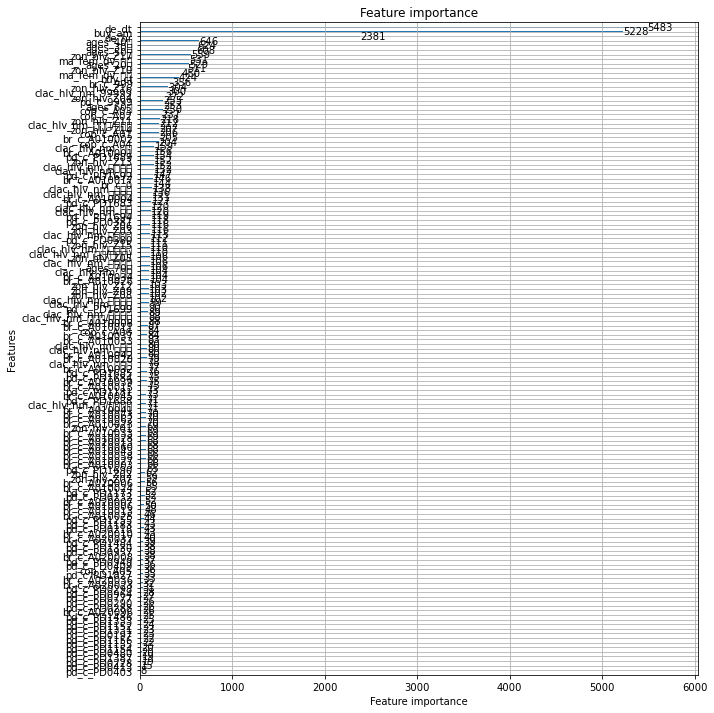

In [169]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgb, ax=ax)
plt.show()

In [170]:
lr = LogisticRegression()
modeling(lr,X_resampled,X_test,y_resampled,y_test)

정확도 : 0.17, 정밀도 : 0.02, 재현율 : 0.88
f1-score : 0.05, auc : 0.51
